<a href="https://colab.research.google.com/github/jatinsharma16/Capstone-Project-Unsupervised/blob/main/Netflix_movie_and_TV_show_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name: Netflix movie and TV show clustering**

Project type: Unsupervised Machine Learning

Contribution: Individual

# **Project Summary:**

# **GITHUB Link**

link: https://github.com/jatinsharma16/Capstone-Project-Unsupervised

# **Problem Statement**

**PROBLEM OVERVIEW**

Netflix as a company is the biggest online platform present at time which provides us with the facility to enjoy movies or TV shows at any given time. In 2018, a report showed that the number of TV shows on Netflix has nearly tripled since 2010 whereas the number of movies has decreased by more than 2000 titles. This shows that how the consumers have shifted from consuming movies to TV shows on regular basis.

The main objective of this project is to bring out the insights hidden in the dataset and bringing out some answers to the questions like what type of content is preferred the most? Do people really prefer watching shows over movies? What are the type of content the people generally love to watch and many more. We will be performing Exploratory Data Analysis to answer these questions and finally we will be clustering the content based on the features which help the platform giving better recommendations and keep their customers engaged.

Giving better recommendations is really important for the OTT platforms since it will generate a interest in the customers and the more engaged the customer is the more revenue the platforms will generate through the customers resulting in profits for the company.

# **Lets Begin**

### Data Description

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mounting the drive for some security reason so that no one can access the data of the file.
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Defining the path of the csv file and reading the content of the file
path = "/content/drive/MyDrive/Almabetter/Modules/Machine_Learning/Unsupervised_Capstone_project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
df.shape

(7787, 12)

The dataset provided to us have 7787 rows which means we have the information about 7787 movies/shows present on the Netflix. Also 12 columns are present in the dataset which will provide us the important information needed for the analysis and clustering.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [9]:
df.describe().shape

(8, 1)

In [10]:
# lets see all the columns present in the dataset
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<h1> Column Description

- **show_id**: Unique Id for every movie/TV show.
- **type**: tells whether the content is movie or a show.
- **title**: Title of the movie/show.
- **director**: Director of the content.
- **cast**: Cast or the actors involved in the movie/show.
- **country**: The country of production of the movie/show.
- **date_added**: The date when the movie/show was added to Netflix.
- **release_year**: Actual release year of the movie/show.
- **rating**: TV ratings of the show.
- **duration**: Total duration of the movie in minutes or in season for shows.
- **listed_in**: Genre of the movie/show.
- **desciption**: The summary description of the movie/show.

### Handling Duplicate Values

In [ ]:
# Checking for duplicates
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


Here we can see that no duplicate values are present in the dataset. Now we will check for the null values.

### Handling Null values

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

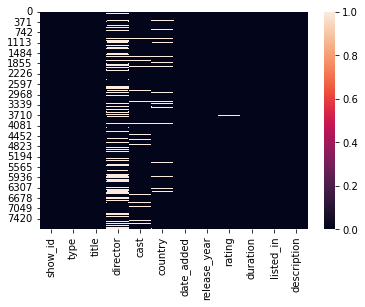

In [ ]:
# Plotting a heatmap to see the null values visually
sns.heatmap(df.isnull())
plt.show()

Since we are performing unsupervised learning and finally we will be merging most columns and then processing them therefore that process would not be affected by the null values and therefore we can ignore the null values present in these columns.

## Exploratory Data Analysis

### type column


In [115]:
df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

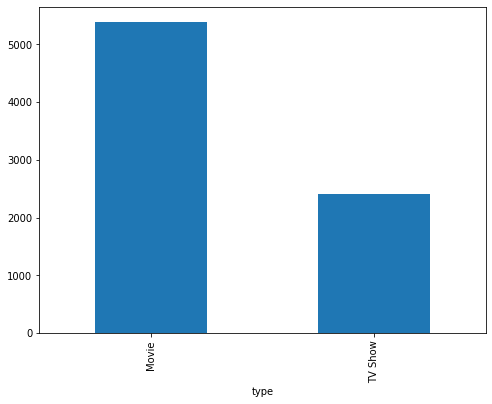

In [116]:
plt.rcParams["figure.figsize"] = (8,6)
df.groupby('type')['show_id'].count().plot(kind='bar')
plt.show()

### Title column

Since we will be working with the textual data therefore it becomes necessary to process the words as well. We will be using word cloud to see what are the most used words in this column.

In [117]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

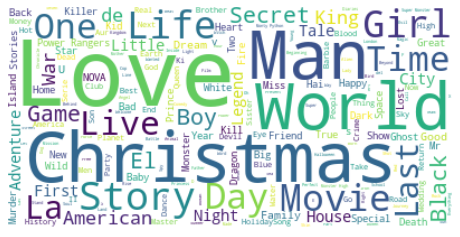

In [118]:
# making a variable for all the column values
df_word_cloud = df['title']
# joining all the words to make a single string so that we can process the string 
text = " ".join(word for word in df_word_cloud)
# Create a list of stopwords
stopwords = set(STOPWORDS)
# generating a wordcloud image using the wordcloud library
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Displaying the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [119]:
len(df['title'].unique())

7787

### Director

In [120]:
len(df['director'].unique())

4050

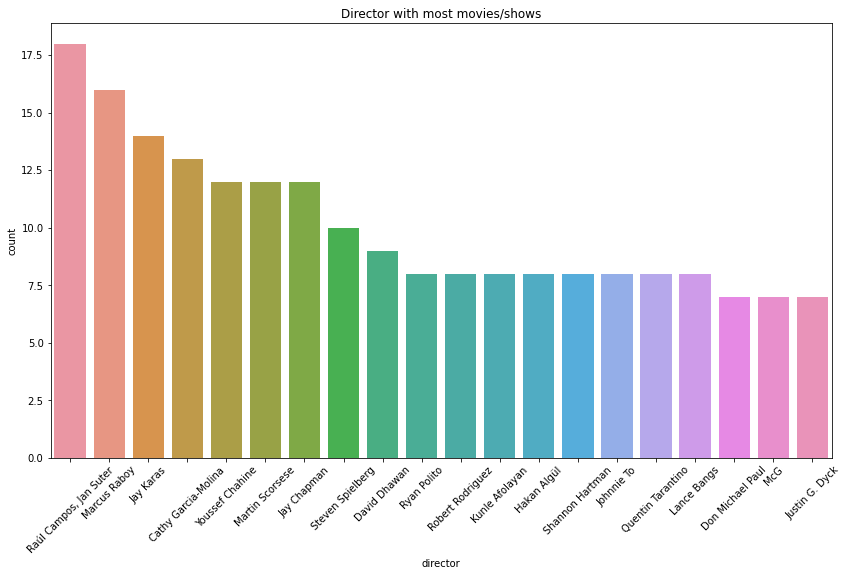

In [121]:
# plotting the top 20 directors using seaborn 
plt.rcParams["figure.figsize"] = (14,8)
sns.countplot(x='director',data=df,order=df.director.value_counts().head(20).index)
plt.title('Director with most movies/shows')
plt.xticks(rotation = 45)
plt.show()

### Cast

In [122]:
df['cast'] = df['cast'].fillna('')

In [123]:
df_actors = df['cast'].copy()

In [124]:
df_actors.head()

0    João Miguel, Bianca Comparato, Michel Gomes, R...
1    Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2    Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3    Elijah Wood, John C. Reilly, Jennifer Connelly...
4    Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
Name: cast, dtype: object

In [125]:
df['cast'][0]

'João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'

In [126]:
# Making a dictionary for actors to analyse their performance
cast_count = {}
cast_final_list = []
cast_list = []
for item in df['cast']:
  cast_list.append(item.split(', '))
# cast_list
for item in range(len(cast_list)):
  cast_final_list.extend(cast_list[item])
# cast_final_list
for item in cast_final_list:
  if item not in cast_count:
    cast_count[item] = cast_final_list.count(item)
# cast_count

In [127]:
cast_df = pd.DataFrame.from_dict(cast_count, orient = 'index', columns = ['count']).sort_values('count', ascending= False)

In [128]:
cast_df.head()

,count
,718
Anupam Kher,42
Shah Rukh Khan,35
Om Puri,30
Naseeruddin Shah,30


In [129]:
cast_df.drop(index='', axis=0, inplace=True)

In [130]:
cast_df.head()

,count
Anupam Kher,42
Shah Rukh Khan,35
Om Puri,30
Naseeruddin Shah,30
Takahiro Sakurai,29


Now, we have out dataframe ready therefore we can analyse the cast.

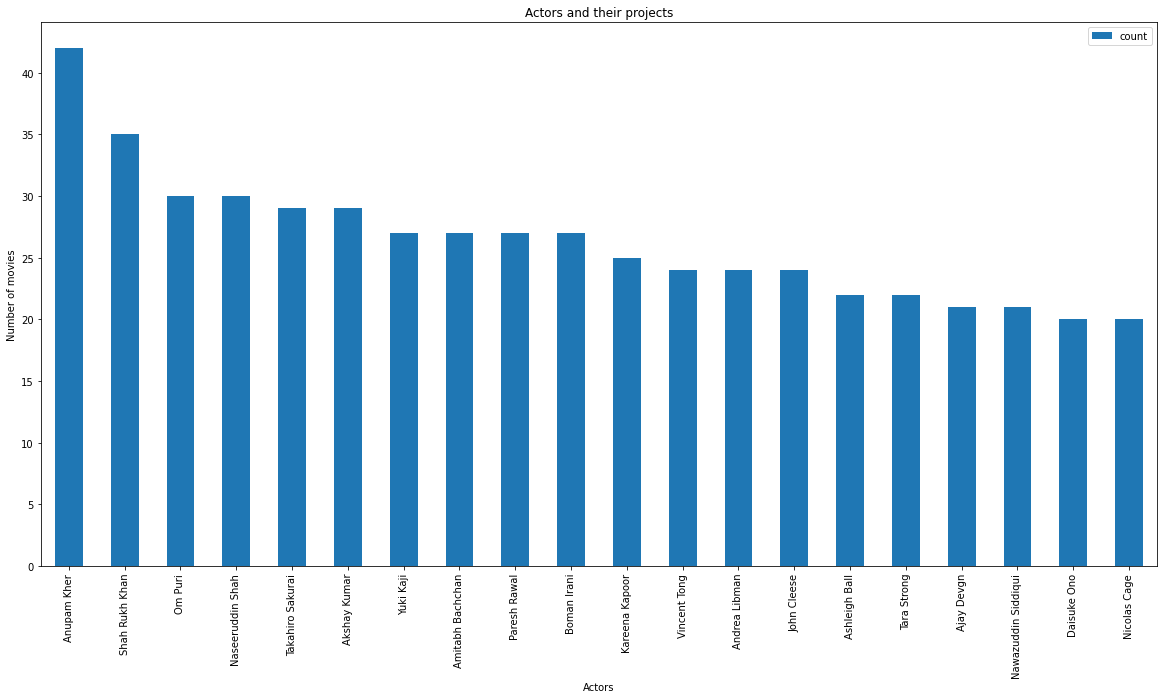

In [131]:
plt.rcParams["figure.figsize"] = (20, 10)
cast_df.head(20).plot(kind='bar')
plt.xlabel('Actors')
plt.ylabel('Number of movies')
plt.title('Actors and their projects')
plt.show()

### Country

In [132]:
# Making a dataframe for countries as well

country_list = []
movie_list = []
show_list = []
for index in range(len(df)):
  if type(df['country'][index]) == str:
    item = df['country'][index].split(",")
    for i in item:
      country_list.append(i.strip())
      if df['type'][index] == 'Movie':
        movie_list.append(i.strip())
      if df['type'][index] == 'TV Show':
        show_list.append(i.strip())
country_details = list(set([(i, country_list.count(i), movie_list.count(i), show_list.count(i)) for i in country_list]))

In [133]:
country_df = (pd.DataFrame(country_details, columns=['country', 'productions', 'movies', 'shows'])).sort_values('productions', ascending=False)
country_df.reset_index()

,index,country,productions,movies,shows
0,37,United States,3297,2431,866
1,45,India,990,915,75
2,112,United Kingdom,723,467,256
3,74,Canada,412,286,126
4,83,France,349,265,84
...,...,...,...,...,...
113,49,Jamaica,1,1,0
114,46,Albania,1,1,0
115,43,East Germany,1,1,0
116,97,Angola,1,1,0


In [136]:
country_df.head()

,country,productions,movies,shows
37,United States,3297,2431,866
45,India,990,915,75
112,United Kingdom,723,467,256
74,Canada,412,286,126
83,France,349,265,84


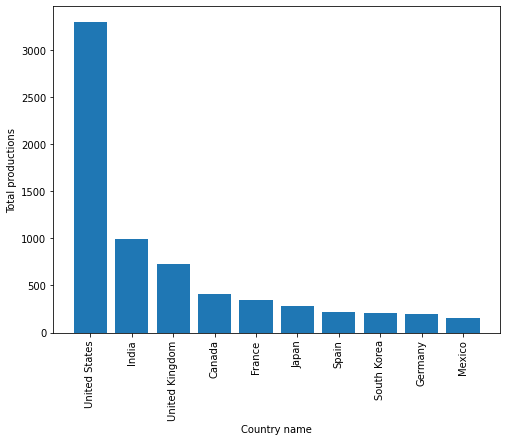

In [137]:
# lets look at the top 10 countries in terms of production
plt.rcParams["figure.figsize"] = (8,6)
plt.bar(x=country_df['country'].head(10), height=country_df['productions'].head(10))
plt.xlabel('Country name')
plt.ylabel('Total productions')
plt.xticks(rotation=90)
plt.show()

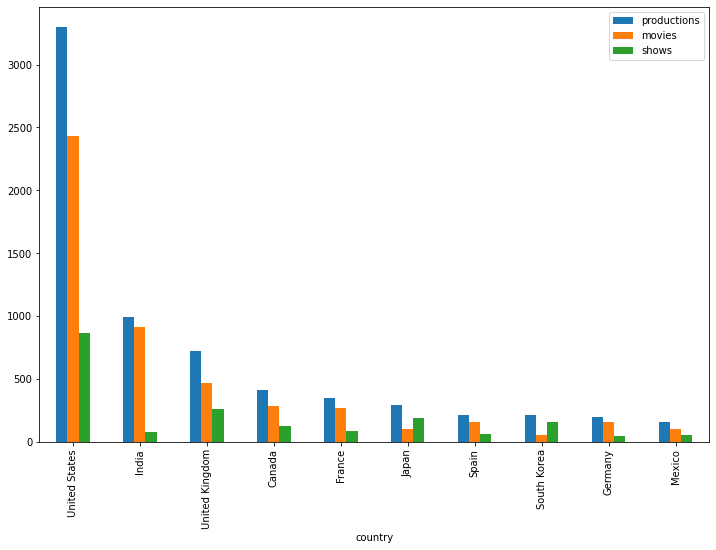

In [138]:
# Lets see the distribution in terms of movies and shows
plt.rcParams["figure.figsize"] = (12,8)
country_df.head(10).plot(x='country', y=['productions', 'movies', 'shows'], kind='bar')
plt.show()

### Date Added

In [139]:
# first we need to process the Date column
df['date_added'] = pd.to_datetime(df['date_added'])
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

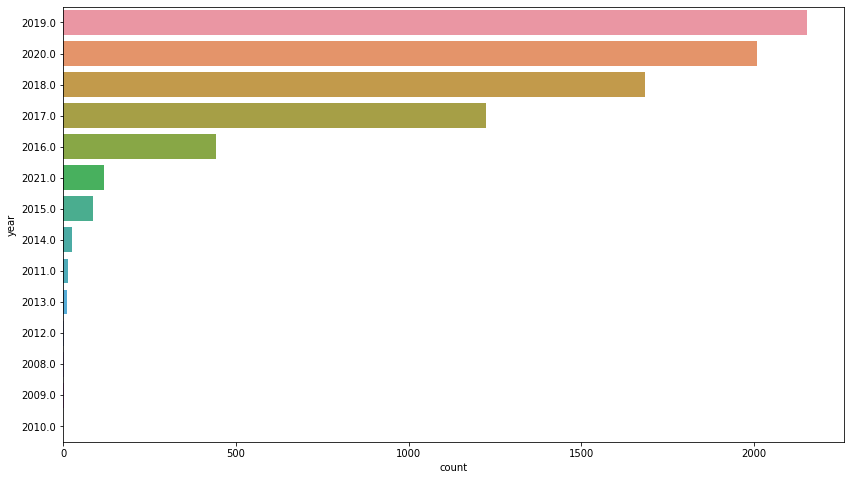

In [140]:
# Analyzing for years
plt.rcParams["figure.figsize"] = (14,8)
sns.countplot(y="year", data=df, order=df['year'].value_counts().index[0:15])
plt.show()

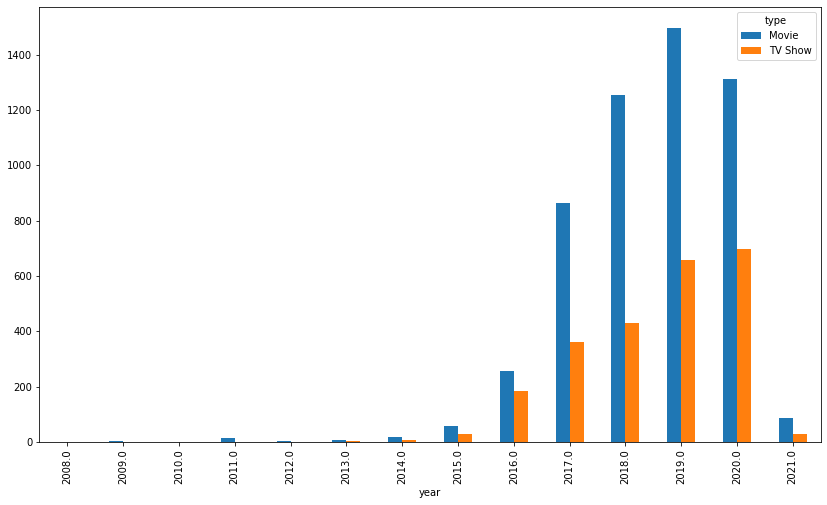

In [141]:
# Content wise plotting the graph
plt.rcParams["figure.figsize"] = (14,8)
df.groupby(['year', 'type'])['show_id'].count().unstack().plot(kind='bar')
plt.show()

### Rating

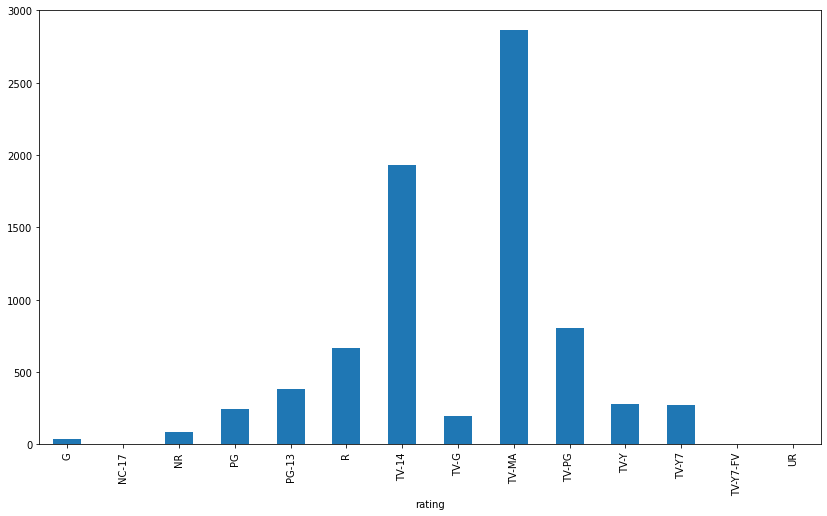

In [142]:
plt.rcParams["figure.figsize"] = (14,8)
df.groupby('rating')['show_id'].count().plot(kind= 'bar')
plt.show()

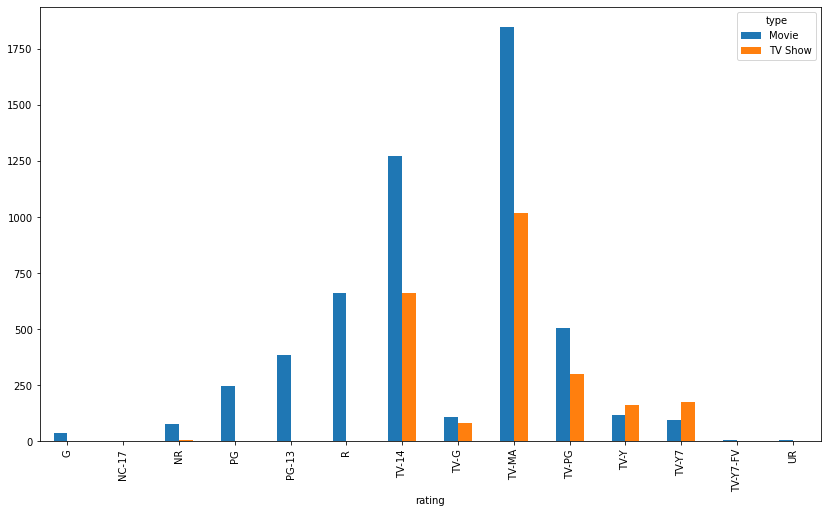

In [143]:
# Rating with respect to the content type
plt.rcParams["figure.figsize"] = (14,8)
df.groupby(['rating', 'type'])['show_id'].count().unstack().plot(kind='bar')
plt.show()

### Duration

In [144]:
# We need to analyze the duration of movies and shows differently as the duration of movies is given in minutes 
# while that of shows is given in season
df_shows=df[df['type']=='TV Show']
df_movies=df[df['type']=='Movie']

# Analyzing the duration of movies first
df_movies['duration'] = df_movies['duration'].str.replace(' min', '')
df_movies['duration'] = df_movies['duration'].astype(int)
df_movies['duration'].head()

1     93
2     78
3     80
4    123
6     95
Name: duration, dtype: int64

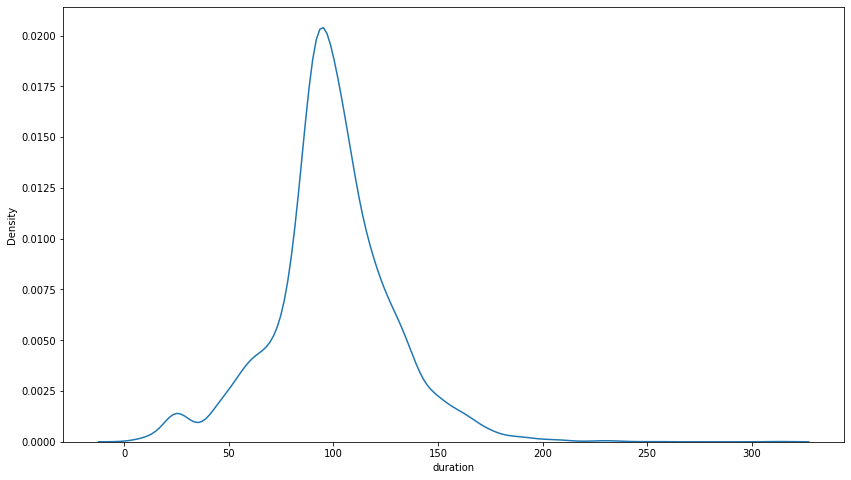

In [145]:
plt.rcParams["figure.figsize"] = (14,8)
sns.kdeplot(data=df_movies['duration'])
plt.show()

In [146]:
# Analyzing for TV shows

df_shows['duration'] = df_shows['duration'].str.replace(' Seasons', '')
df_shows['duration'] = df_shows['duration'].str.replace(' Season', '')
df_shows['duration'] = df_shows['duration'].astype(int)

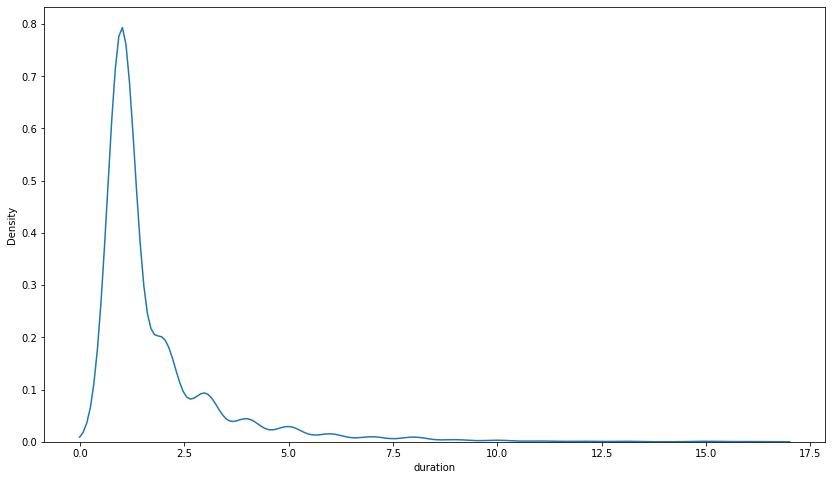

In [147]:
# Plotting distribution plot for shows duration
plt.rcParams["figure.figsize"] = (14,8)
sns.kdeplot(data=df_shows['duration'])
plt.show()

### Listed in (Genre)

In [148]:
df.groupby('listed_in')['show_id'].count()

listed_in
Action & Adventure                                              99
Action & Adventure, Anime Features, Children & Family Movies     3
Action & Adventure, Anime Features, Classic Movies               1
Action & Adventure, Anime Features, Horror Movies                1
Action & Adventure, Anime Features, International Movies        28
                                                                ..
TV Horror, TV Mysteries, Teen TV Shows                           1
TV Horror, Teen TV Shows                                         1
TV Sci-Fi & Fantasy, TV Thrillers                                1
TV Shows                                                        12
Thrillers                                                       49
Name: show_id, Length: 492, dtype: int64

In [149]:
# Since every movie is listed in multiple genres therefore lets make a list of all the genres and count of movies
all_genre = []
genre_count = {}
genre_list = list(df['listed_in'])
# genre_list
for item in range(len(genre_list)):
  all_genre.extend(genre_list[item].split(", "))
# all_genre
for item in all_genre:
  if item not in genre_count:
    genre_count[item] = all_genre.count(item)
genre_count

{'International TV Shows': 1199,
 'TV Dramas': 704,
 'TV Sci-Fi & Fantasy': 76,
 'Dramas': 2106,
 'International Movies': 2437,
 'Horror Movies': 312,
 'Action & Adventure': 721,
 'Independent Movies': 673,
 'Sci-Fi & Fantasy': 218,
 'TV Mysteries': 90,
 'Thrillers': 491,
 'Crime TV Shows': 427,
 'Docuseries': 353,
 'Documentaries': 786,
 'Sports Movies': 196,
 'Comedies': 1471,
 'Anime Series': 148,
 'Reality TV': 222,
 'TV Comedies': 525,
 'Romantic Movies': 531,
 'Romantic TV Shows': 333,
 'Science & Nature TV': 85,
 'Movies': 56,
 'British TV Shows': 232,
 'Korean TV Shows': 150,
 'Music & Musicals': 321,
 'LGBTQ Movies': 90,
 'Faith & Spirituality': 57,
 "Kids' TV": 414,
 'TV Action & Adventure': 150,
 'Spanish-Language TV Shows': 147,
 'Children & Family Movies': 532,
 'TV Shows': 12,
 'Classic Movies': 103,
 'Cult Movies': 59,
 'TV Horror': 69,
 'Stand-Up Comedy & Talk Shows': 52,
 'Teen TV Shows': 60,
 'Stand-Up Comedy': 329,
 'Anime Features': 57,
 'TV Thrillers': 50,
 'Classi

In [150]:
genre_df = pd.DataFrame.from_dict(genre_count, orient='index', columns = ['count']).sort_values('count', ascending = False)

In [151]:
genre_df

,count
International Movies,2437
Dramas,2106
Comedies,1471
International TV Shows,1199
Documentaries,786
Action & Adventure,721
TV Dramas,704
Independent Movies,673
Children & Family Movies,532
Romantic Movies,531


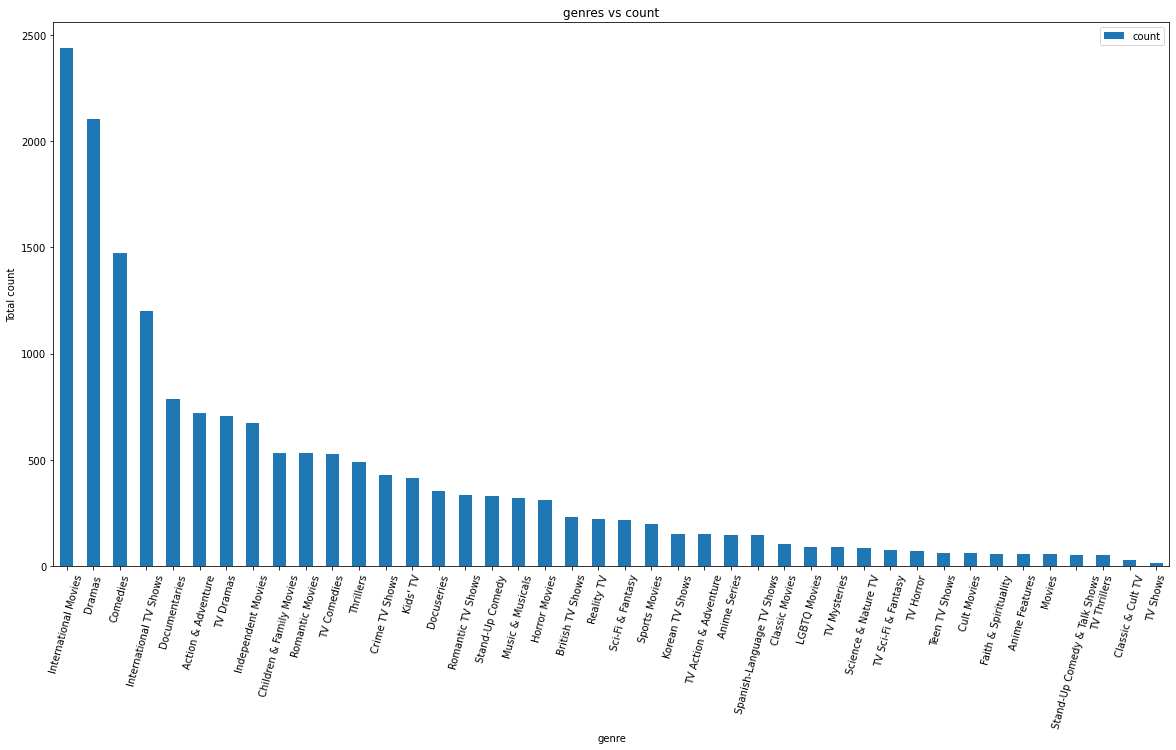

In [152]:
plt.rcParams["figure.figsize"] = (20, 10)
genre_df.plot(kind='bar')
plt.xlabel("genre")
plt.ylabel("Total count")
plt.title("genres vs count")
plt.xticks(rotation=75)
plt.show()

### Description

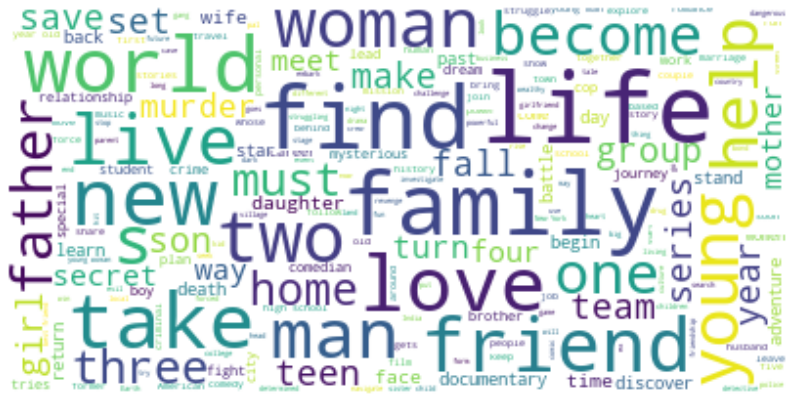

In [153]:
# Being a textual column lets create a word cloud of this column
plt.rcParams["figure.figsize"] = (14,10)
df_word_cloud = df['description']
text = " ".join(word for word in df_word_cloud)
# Stopwords list
stopwords = set(STOPWORDS)
# Generating word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# displaying the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

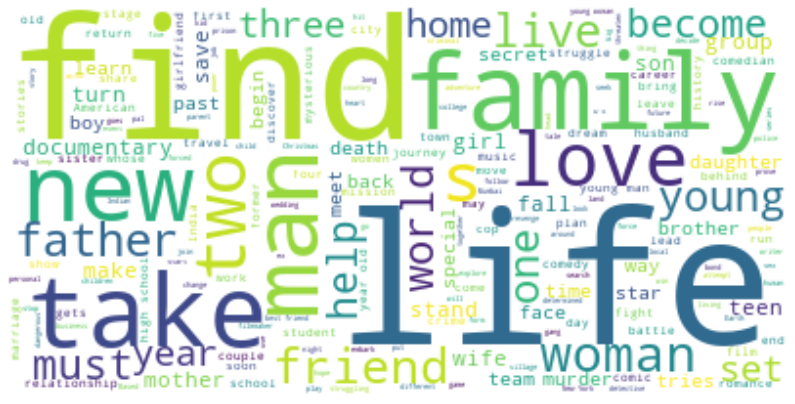

In [154]:
# Wordcloud on description of movies

plt.rcParams["figure.figsize"] = (14,10)
df_word_cloud = df_movies['description']
text = " ".join(word for word in df_word_cloud)
# Stopwords list
stopwords = set(STOPWORDS)
# Generating word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# displaying the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

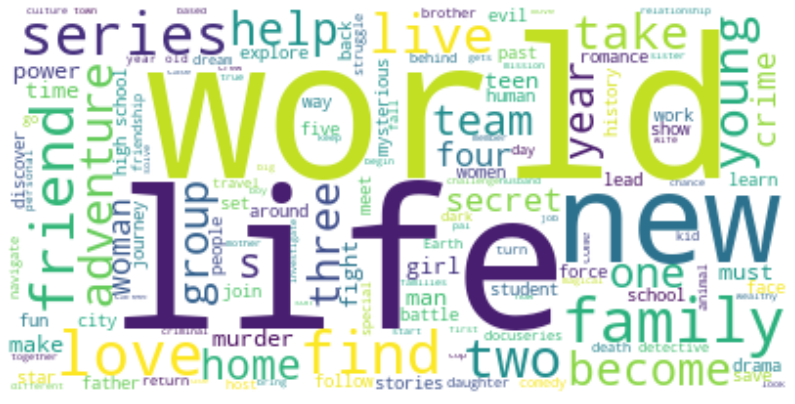

In [155]:
# Wordcloud on description of shows

plt.rcParams["figure.figsize"] = (14,10)
df_word_cloud = df_shows['description']
text = " ".join(word for word in df_word_cloud)
# Stopwords list
stopwords = set(STOPWORDS)
# Generating word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# displaying the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Country wise Genres preferred

#### Genre dataframe function

In [156]:
def country_genre_count(df, country_name):
  country_genre_dict = {}
  for index, item in df.iterrows():
    if(type(item['country']) == str):
      countries = item['country'].split(', ')
      if country_name in countries:
        gen_list = []
        gen_list.extend(item['listed_in'].split(', '))
        for genre in gen_list:
          if genre in country_genre_dict:
            country_genre_dict[genre] += 1
          if genre not in country_genre_dict:
            country_genre_dict[genre] = 1 

  genre_dict_df = pd.DataFrame.from_dict(country_genre_dict, orient='index', columns = ['count'])
  genre_dict_df = genre_dict_df.sort_values('count', ascending = False)
  return genre_dict_df.head(10)

#### Bar Chart function

In [157]:
def bar_chart(country_data, name):
  plt.rcParams["figure.figsize"] = (10,8)
  country_data.plot(kind = 'bar')
  plt.title(f'Top genres watched in {name}')
  plt.show()

#### United States

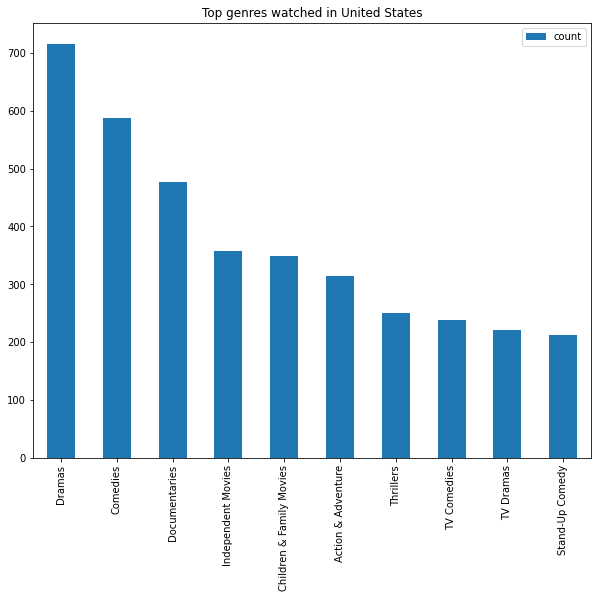

In [158]:
us_genre = country_genre_count(df, 'United States')
bar_chart(us_genre, 'United States')

#### India

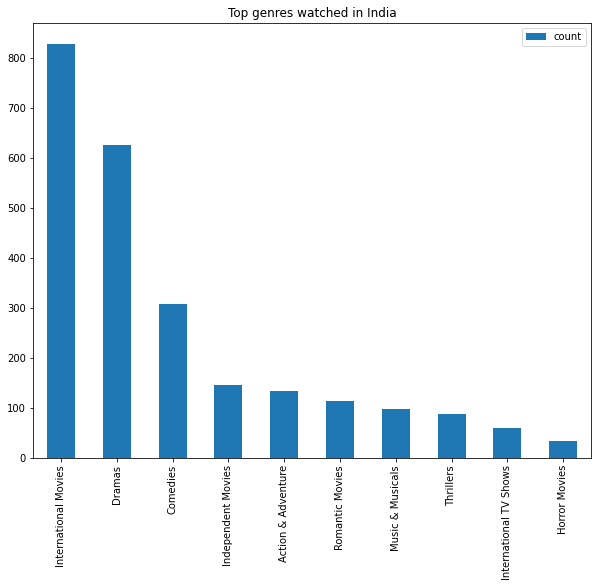

In [159]:
india_genre = country_genre_count(df, 'India')
bar_chart(india_genre, 'India')

#### United Kingdom

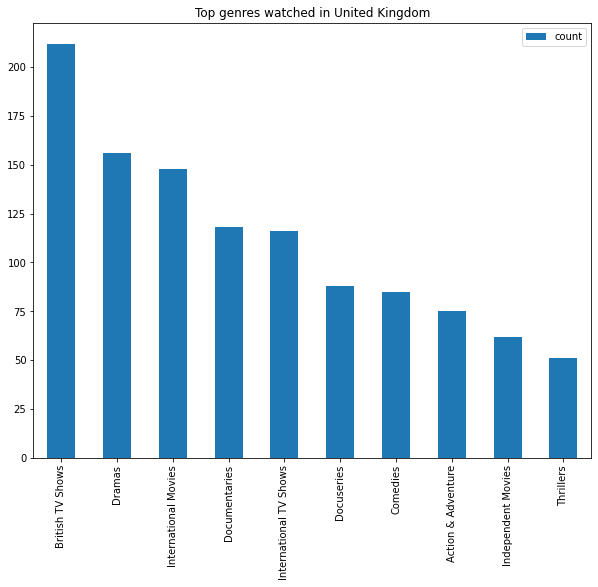

In [160]:
uk_genre = country_genre_count(df, 'United Kingdom')
bar_chart(uk_genre, 'United Kingdom')

#### Canada

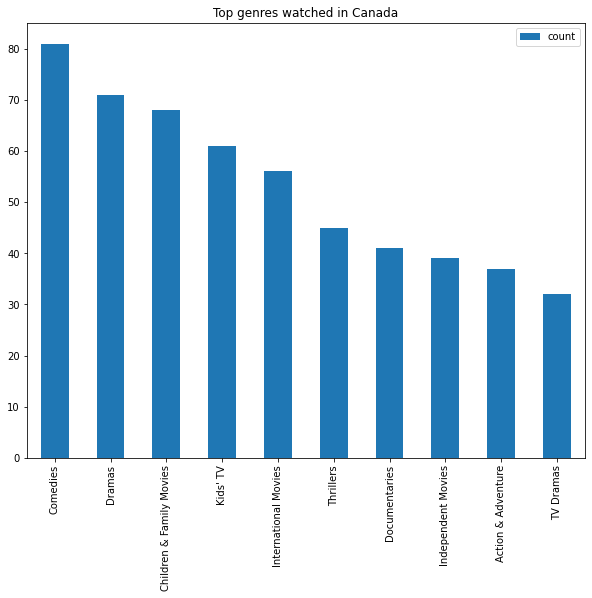

In [161]:
canada_genre = country_genre_count(df, 'Canada')
bar_chart(canada_genre, 'Canada')

#### France

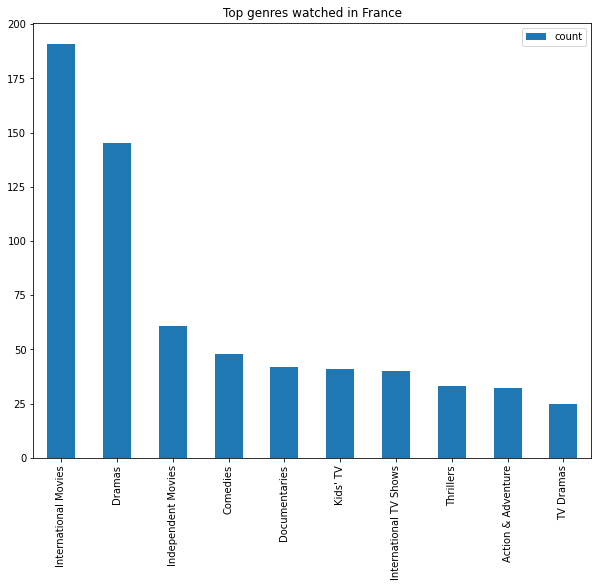

In [162]:
france_genre = country_genre_count(df, 'France')
bar_chart(france_genre, 'France')

### Country wise Type analysis

#### type analysis dataframe function

In [163]:
def country_type_count(df, country_name):
  country_type_dict = {}
  for index, item in df.iterrows():
    if(type(item['country']) == str):
      countries = item['country'].split(', ')
      if country_name in countries:
        type_list = []
        type_list.append(item['type'])
        for genre in type_list:
          if genre in country_type_dict:
            country_type_dict[genre] += 1
          if genre not in country_type_dict:
            country_type_dict[genre] = 1 

  type_dict_df = pd.DataFrame.from_dict(country_type_dict, orient='index', columns = ['count'])
  type_dict_df = type_dict_df.sort_values('count', ascending = False)
  return type_dict_df.head(10)

#### Bar plot and pie chart function

In [164]:
def pie_bar_chart(df, name, label1, label2):
  fig, ax = plt.subplots(1,2, figsize = (10,5))
  # bar chart
  ax1 = plt.subplot(1,2,1)
  plt.pie(df['count'],
          labels=[label1, label2],
          explode = [0.1,0.1],
          startangle = 90,
          autopct = '%1.1f%%')

  # pie chart
  ax2 = plt.subplot(1,2,2)
  df.plot(kind='bar', ax=ax2)
  plt.xlabel('Type')
  plt.ylabel('Count')
  plt.suptitle(f'Type of content watched in {name}')
  plt.show()

#### United States

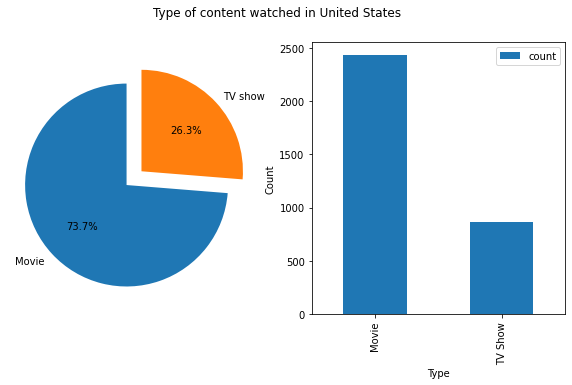

In [165]:
us_type = country_type_count(df, 'United States')
pie_bar_chart(us_type, 'United States', 'Movie', 'TV show')

#### India

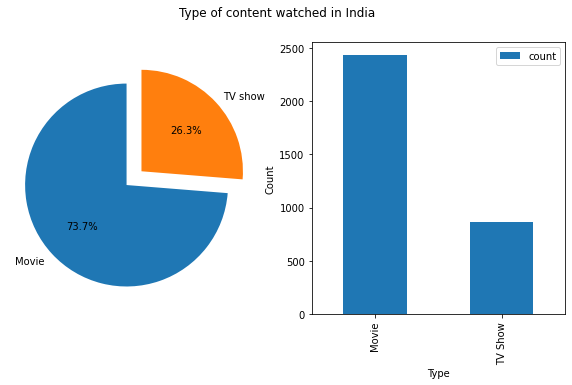

In [166]:
india_type = country_type_count(df, 'India')
pie_bar_chart(us_type, 'India', 'Movie', 'TV show')

#### United Kingdom

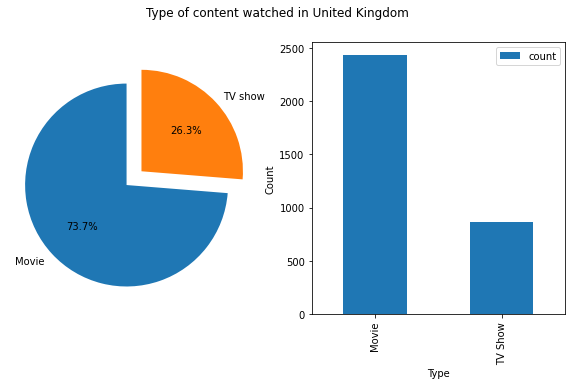

In [167]:
uk_type = country_type_count(df, 'United Kingdom')
pie_bar_chart(us_type, 'United Kingdom', 'Movie', 'TV show')

#### Canada

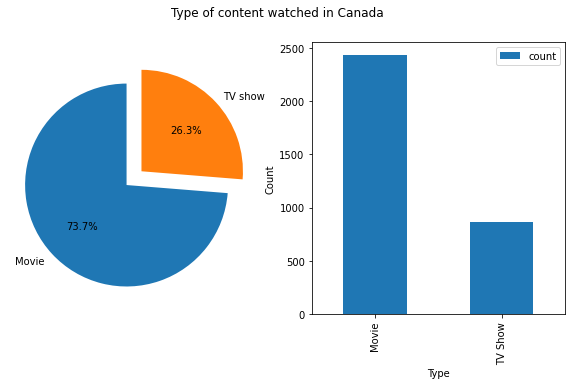

In [168]:
canada_type = country_type_count(df, 'Canada')
pie_bar_chart(us_type, 'Canada', 'Movie', 'TV show')

#### France

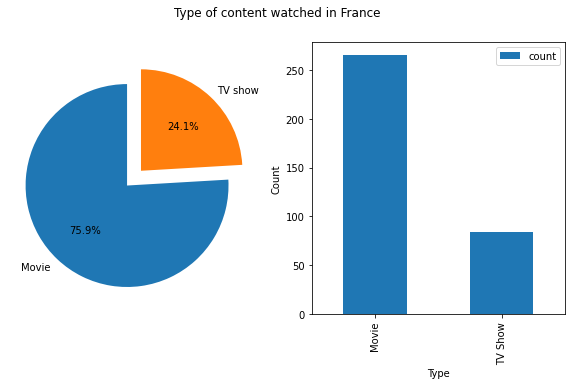

In [169]:
us_type = country_type_count(df, 'France')
pie_bar_chart(us_type, 'France', 'Movie', 'TV show')

### Country wise rating analysis

#### Rating dataframe function

In [170]:
def country_rating_count(df, country_name):
  country_rating_dict = {}
  for index, item in df.iterrows():
    if(type(item['country']) == str):
      countries = item['country'].split(', ')
      if country_name in countries:
        rating_list = []
        if type(item['rating']) == str:
          rating_list.extend(item['rating'].split(', '))
          for rating in rating_list:
            if rating in country_rating_dict:
              country_rating_dict[rating] += 1
            if rating not in country_rating_dict:
              country_rating_dict[rating] = 1 

  rating_dict_df = pd.DataFrame.from_dict(country_rating_dict, orient='index', columns = ['count'])
  rating_dict_df = rating_dict_df.sort_values('count', ascending = False)
  return rating_dict_df.head(10)

In [171]:
def rating_bar_plot(df, name):
  plt.rcParams["figure.figsize"] = (8,5)
  df.plot(kind = 'bar')
  plt.title(f'The content watched in {name} belongs to ratings')
  plt.show()

#### United States

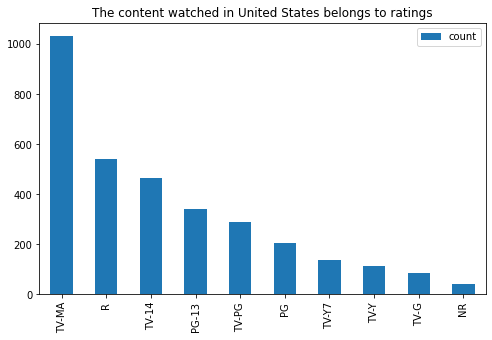

In [172]:
us_rating = country_rating_count(df, 'United States')
rating_bar_plot(us_rating, 'United States')

#### India

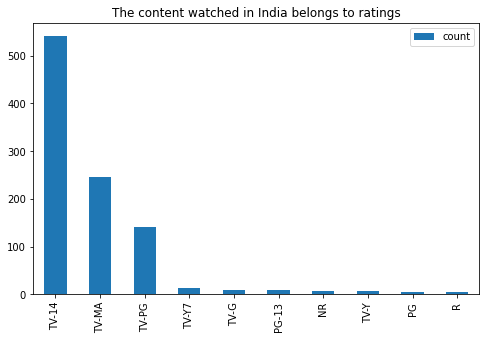

In [173]:
india_rating = country_rating_count(df, 'India')
rating_bar_plot(india_rating, 'India')

#### United Kingdom

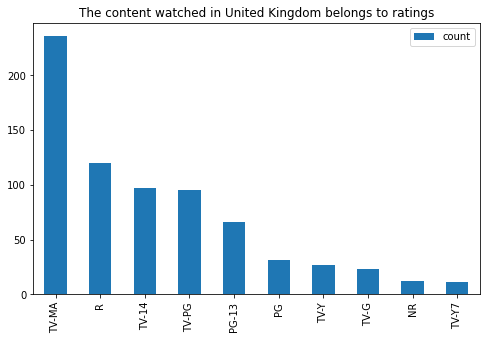

In [174]:
uk_rating = country_rating_count(df, 'United Kingdom')
rating_bar_plot(uk_rating, 'United Kingdom')

#### Canada

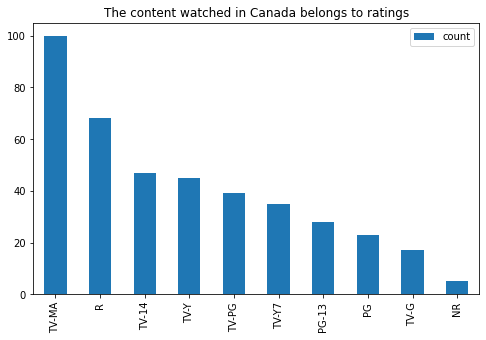

In [175]:
canada_rating = country_rating_count(df, 'Canada')
rating_bar_plot(canada_rating, 'Canada')

#### France

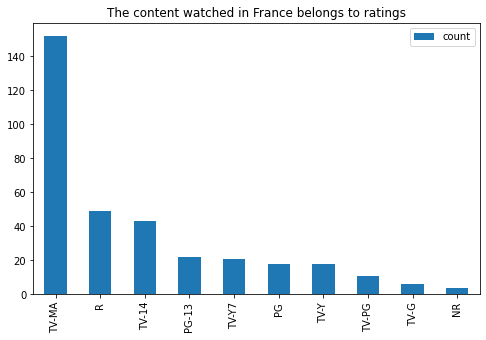

In [176]:
france_rating = country_rating_count(df, 'France')
rating_bar_plot(france_rating, 'France')

### Country wise word cloud of title

### Country wise word cloud of description

## Clustering